In [1]:
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange

sns.set_theme(style="whitegrid")

ADATA_PATH = "data/adata_top1000_s3_k30.h5ad"

adata = ad.read_h5ad(ADATA_PATH)

In [22]:
from tqdm import tqdm, trange

GENES = adata.var_names

x = np.asarray(adata.X.todense())[:300000, :250]
corr = np.zeros((x.shape[1], x.shape[1]))


for i in trange(corr.shape[0]):
    for j in range(corr.shape[0]):
        if i == j:
            corr[i, j] = 1
        elif i > j:  # small speedup
            corr[i, j] = corr[j, i]
        else:
            corr[i, j] = np.corrcoef(x[:, i], x[:, j])[0, 1]

100%|██████████| 250/250 [02:13<00:00,  1.87it/s]


c:\Users\timo\.conda\envs\pyg\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\timo\.conda\envs\pyg\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


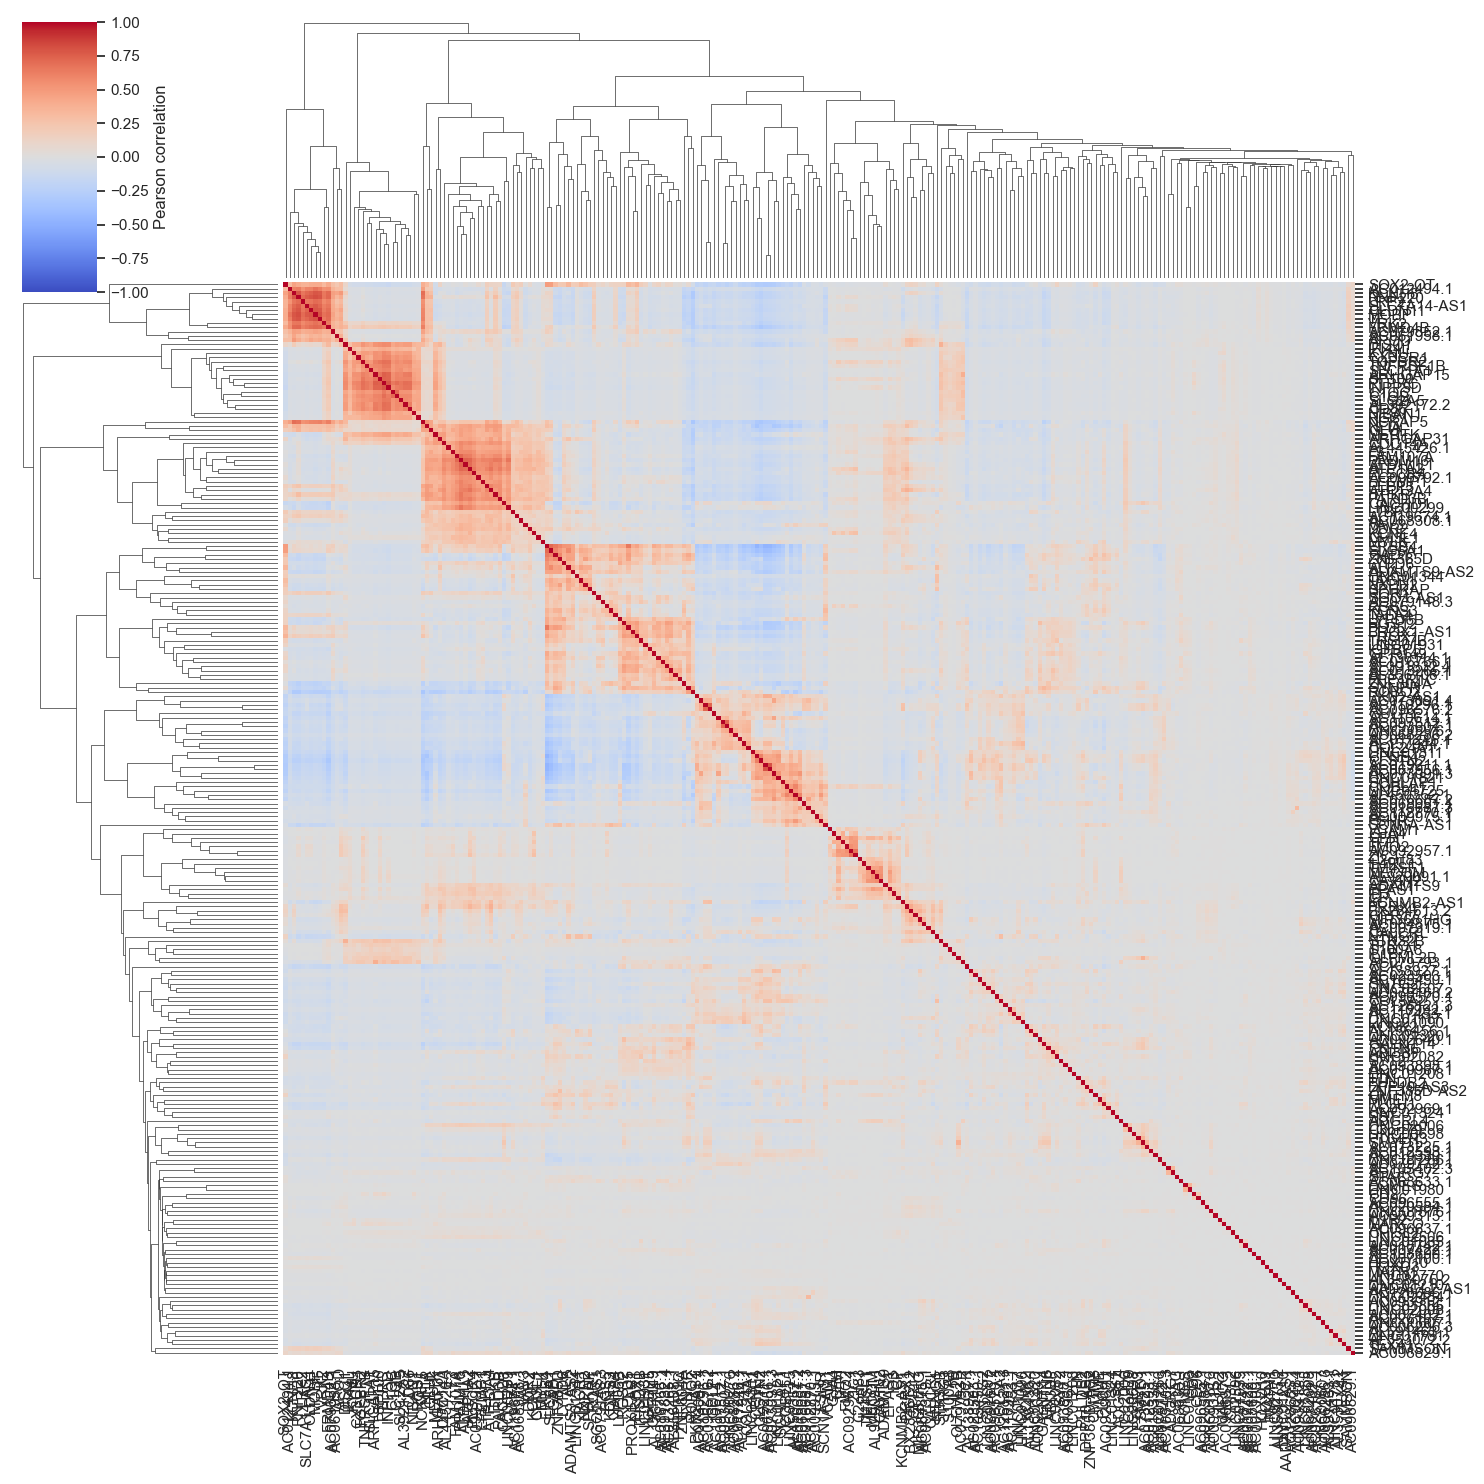

In [23]:
sns.clustermap(corr, xticklabels=GENES[:corr.shape[0]], yticklabels=GENES[:corr.shape[0]], cmap="coolwarm", center=0, figsize=(15, 15), cbar_kws={"label": "Pearson correlation"},  vmin=-1, vmax=1)